In [1]:
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
risk_free_rate = 0.05

Beta from formula:  0.915
Beta from regression:  0.915
Alpha from regression:  0.004


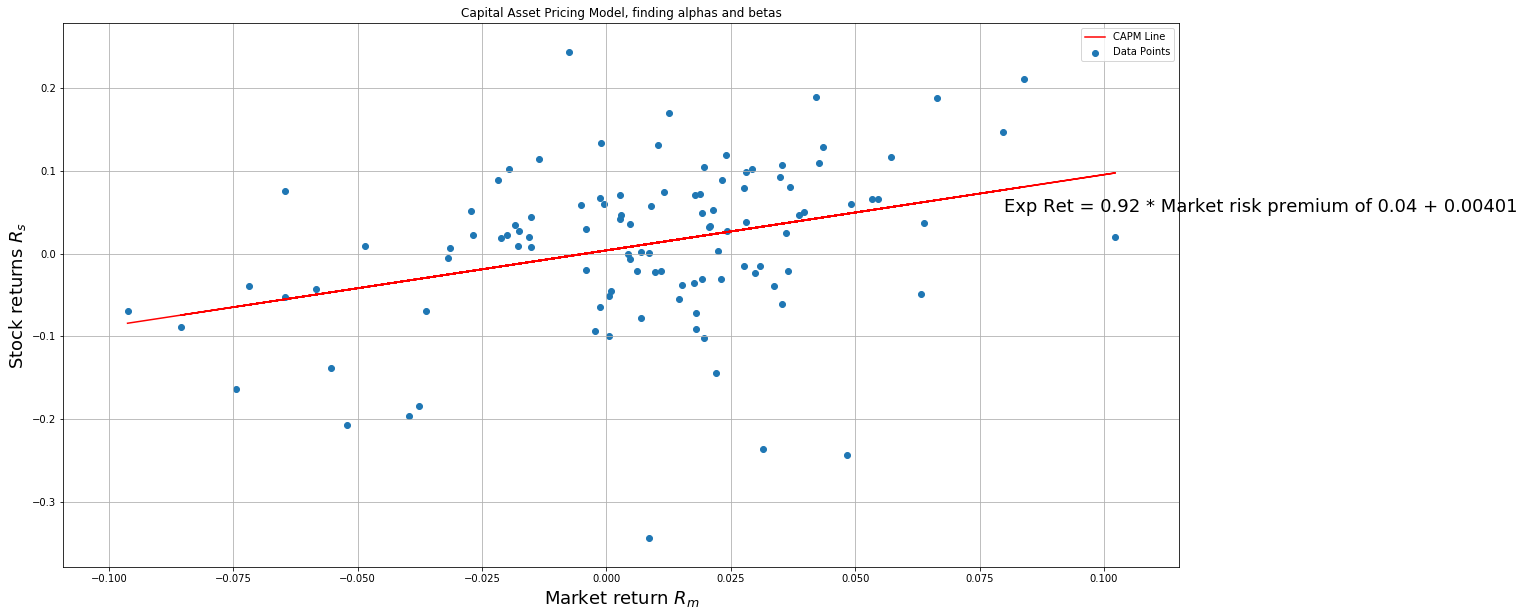

Expected returns from EXPE:  0.087
Market Returns from ^GSPC:  0.09


In [31]:
def capm(start_date, end_date, ticker1, ticker2):
    #getting yahoo finance data
    stock1 = pdr.get_data_yahoo(ticker1, start_date, end_date)
    stock2 = pdr.get_data_yahoo(ticker2, start_date, end_date)
    
    #make it monthly returns
    return_stock1 = stock1.resample('M').last()
    return_stock2 = stock2.resample('M').last()
    
    #adjusted closing price
    data = pd.DataFrame({'s_adjclose': return_stock1['Adj Close'], 'm_adjclose': return_stock2['Adj Close']}, index= return_stock1.index)
    
    #logarithm of returns
    data[['s_returns','m_returns']] = np.log(data[['s_adjclose', 'm_adjclose']]/data[['s_adjclose', 'm_adjclose']].shift(1))
    #remove missing values
    data = data.dropna()
    
    
    #create covariance matrix
    covmat = np.cov(data['s_returns'], data['m_returns'])
    
    #calcualte beta
    beta = covmat[0,1]/covmat[1,1]
    print('Beta from formula: ' , round(beta,3))
    
    #regression line to data
    beta, alpha = np.polyfit(data['m_returns'], data['s_returns'], deg=1)
    print("Beta from regression: ", round(beta,3))
    print("Alpha from regression: ", round(alpha,3))
    
    #graph it
    fig, axis = plt.subplots(1, figsize=(20,10))
    axis.scatter(data['m_returns'], data['s_returns'], label= 'Data Points')
    axis.plot(data['m_returns'], beta*data['m_returns'] + alpha, color='red', label='CAPM Line')
    plt.title('Capital Asset Pricing Model, finding alphas and betas')
    plt.xlabel('Market return $R_m$', fontsize = 18)
    plt.ylabel('Stock returns $R_s$', fontsize = 18)
    plt.text(0.08, 0.05, r'Exp Ret = {} * Market risk premium of {} + {}'.format(round(beta,2), round(data['m_returns'].mean()*12-risk_free_rate,2), round(alpha,5)) , fontsize=18)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    #calculate the expected returns from CAPM
    expected_return = risk_free_rate + beta*(data['m_returns'].mean()*12 - risk_free_rate)
    print("Expected returns from {}: ".format(ticker1), round(expected_return,3))
    market_returns = data['m_returns'].mean()*12
    print('Market Returns from {}: '.format(ticker2), round(market_returns,3))
    
if __name__ == "__main__":
    capm('2010-01-01', '2019-01-01', 'EXPE', '^GSPC')
    